In [33]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

## Authentication keys
1. Go to https://apps.twitter.com/
2. Create an App (if you don't have one yet)
3. Grant read-only access to your account
4. Copy the four keys and paste them here:

In [34]:
api_key = "tDTMJtC7sAz39hEj4rX5vb0sJ" # <---- Add your API Key
api_secret = "5D9lXFpNr5Mpr8D4SQCak4pDH4NpzvyhmxXT4h5lxRYGqtfDHg" # <---- Add your API Secret
access_token = "1196013206-P6T1RgOl9Dwq70RUNXrczzjSxsuQtrlKimQBGmn" # <---- Add your access token
access_token_secret = "hBq8zik4WntPTB2hZEfSpVZNA0F7zAtj3mKjvb4GHyklz" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [37]:
results = []
query = ["tornado"]
for tweet in tweepy.Cursor(api.search, q=query).items(1000):
    results.append(tweet)

In [38]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["user_coordinates"] = [tweet.coordinates for tweet in results]

    return data_set
data_set = process_results(results)

In [39]:
data_set

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,user_coordinates
0,793876335038910465,My naps are so routine that I didn't take one ...,2016-11-02 18:04:02,0,0,Twitter for iPhone,593221400,JocularJake,Footer,2012-05-29 01:09:31,My goal in life is to have my own Wikipedia pa...,437,248,,None
1,793876322909032448,@tornado_cat I'm dangerously sleep-deprived an...,2016-11-02 18:03:59,0,0,Twitter Web Client,25564232,actioncookbook,actioncookbook,2009-03-20 19:57:21,"pick up dry cleaning, pay water bill, mow lawn...",6328,301,"Louisville, KY",None
2,793876233528414212,RT @xkcdComic: Tornado Safety Tips https://t.c...,2016-11-02 18:03:38,120,0,Twitter for Android,3183562115,KitCwx,Kit Cloninger,2015-04-19 15:45:57,Senior Meteorology student (with a minor in ma...,115,224,,None
3,793876210384244736,RT @LEONORHERNANDE3: Asi quedó el #hotelcolon ...,2016-11-02 18:03:32,6,0,Twitter for Windows Phone,2205385176,YISELALVAREZ2,YISEL ALVAREZ,2013-11-20 18:30:58,,25,48,,None
4,793876105123946496,Dropping this fresh jam. MegAdele mashup #2 - ...,2016-11-02 18:03:07,0,0,Twitter Web Client,15828239,Pluimer,Ben Pluimer,2008-08-12 21:13:12,"TV and commercial director, very decent guy. L...",800,275,"Los Angeles, California",None
5,793876079098355712,"@actioncookbook Aw heck, now everything makes ...",2016-11-02 18:03:01,0,0,Twitter for Android,345557941,tornado_cat,trashcat,2011-07-30 20:01:46,NaNoWriMo 2016. 23. Proud Slytherin. Bitter hag.,231,345,12 grimmauld place,None
6,793876029336981504,Monthly tornado warning test in Duluth as of 1...,2016-11-02 18:02:49,0,1,Mobile Web (M5),396399850,akpix,Andrew Krueger,2011-10-23 06:39:08,"Writer, editor, photographer, videographer and...",2272,536,"Duluth, Minn.",None
7,793876000387977216,The song the tornado siren test is trying to d...,2016-11-02 18:02:42,0,0,Tweetbot for Mac,49584074,davegatchell,dave gatchell,2009-06-22 09:35:40,"Doer of stuff for @tpvhq, @bugfixband, and @10...",395,620,Minneapolis / Tokyo,None
8,793875960705671168,Tornado? Oh right...it's the first Wednesday o...,2016-11-02 18:02:33,0,0,Twitter Web Client,2490434971,NightOfMajin,TheUnknownShortGirl,2014-05-11 21:27:21,Catholic: Coming soon. I like nature from a di...,317,1350,"St Cloud, MN",None
9,793875900869677056,"@NWSHouston FYI re safety tips, for tornados.\...",2016-11-02 18:02:18,0,0,Twitter for iPad,34116978,iaidoka1,Emily Egan,2009-04-22 00:53:13,I practice main line Musō Jikiden Eishin Ryū I...,75,146,Texas,None


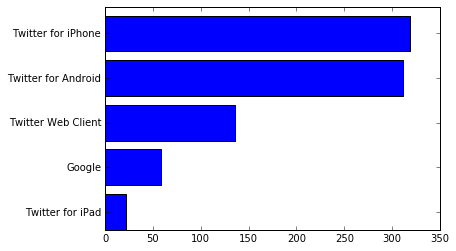

In [40]:
sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(range(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()

In [41]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(data_set.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,tornado,816
1,co,527
2,https,523
3,the,435
4,rt,408
5,is,210
6,and,138
7,of,127
8,de,120
9,in,110


In [23]:
tweet

Status(truncated=False, in_reply_to_status_id_str=None, text='Tornado Safety Tips https://t.co/mNlzKlt9Q1', entities={'urls': [{'display_url': 'xkcd.com/1754/', 'expanded_url': 'http://xkcd.com/1754/', 'url': 'https://t.co/mNlzKlt9Q1', 'indices': [20, 43]}], 'symbols': [], 'hashtags': [], 'user_mentions': []}, author=User(entities={'description': {'urls': []}}, name='two-flavor cat food', statuses_count=96281, favourites_count=29202, id_str='2441116640', profile_background_tile=True, follow_request_sent=False, _api=<tweepy.api.API object at 0x1194e86d8>, lang='en', _json={'profile_sidebar_border_color': '000000', 'profile_text_color': '000000', 'listed_count': 15, 'entities': {'description': {'urls': []}}, 'following': False, 'default_profile': False, 'statuses_count': 96281, 'profile_background_tile': True, 'created_at': 'Sun Apr 13 05:58:56 +0000 2014', 'geo_enabled': True, 'id_str': '2441116640', 'verified': False, 'description': 'not actually a neko, part-time PC gamer, professiona

In [42]:
data_set.to_csv("tornado nov 2.csv")

In [46]:
#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print(status.text)
        
        
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(track=["python"], async=True)